### iris를 이용하여 다중입력

In [ ]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')

X = iris.drop('species', axis=1)
y = iris['species']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(120, 4) (120,)
(30, 4) (30,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(96, 4) (96,)
(24, 4) (24,)
(30, 4) (30,)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers

inputs = layers.Input(shape=(4,))

x = layers.Dense(64,activation='relu')(inputs)
x = layers.Dense(64,activation='relu')(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(3,activation='softmax')(x)

model = Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_33 (Dense)            (None, 64)                320       
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


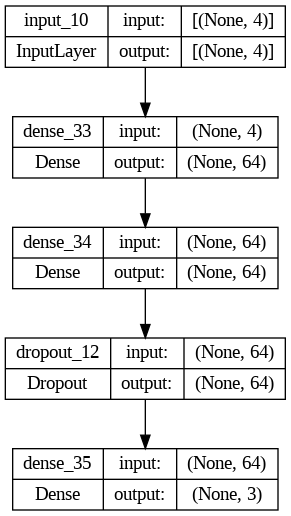

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

EPOCHS = 100
BATCH_SIZE = 64

history = model.fit(X_train, y_train,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data = (X_val,y_val),
                    callbacks = [early_stop])

Epoch 1/100
2/2 [==============================] - 1s 228ms/step - loss: 1.2479 - acc: 0.3438 - val_loss: 1.0469 - val_acc: 0.4583
Epoch 2/100
2/2 [==============================] - 0s 61ms/step - loss: 1.1427 - acc: 0.2604 - val_loss: 1.0124 - val_acc: 0.4167
Epoch 3/100
2/2 [==============================] - 0s 41ms/step - loss: 1.0026 - acc: 0.5000 - val_loss: 1.0012 - val_acc: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 58ms/step - loss: 1.0250 - acc: 0.4167 - val_loss: 0.9920 - val_acc: 0.5417
Epoch 5/100
2/2 [==============================] - 0s 62ms/step - loss: 0.9445 - acc: 0.5312 - val_loss: 0.9729 - val_acc: 0.5417
Epoch 6/100
2/2 [==============================] - 0s 61ms/step - loss: 0.8885 - acc: 0.6146 - val_loss: 0.9433 - val_acc: 0.5417
Epoch 7/100
2/2 [==============================] - 0s 61ms/step - loss: 0.8592 - acc: 0.6458 - val_loss: 0.9057 - val_acc: 0.5417
Epoch 8/100
2/2 [==============================] - 0s 40ms/step - loss: 0.8270 - acc: 0.7

In [ ]:
def plot_history(history):
  his_dict = history.history
  lose

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

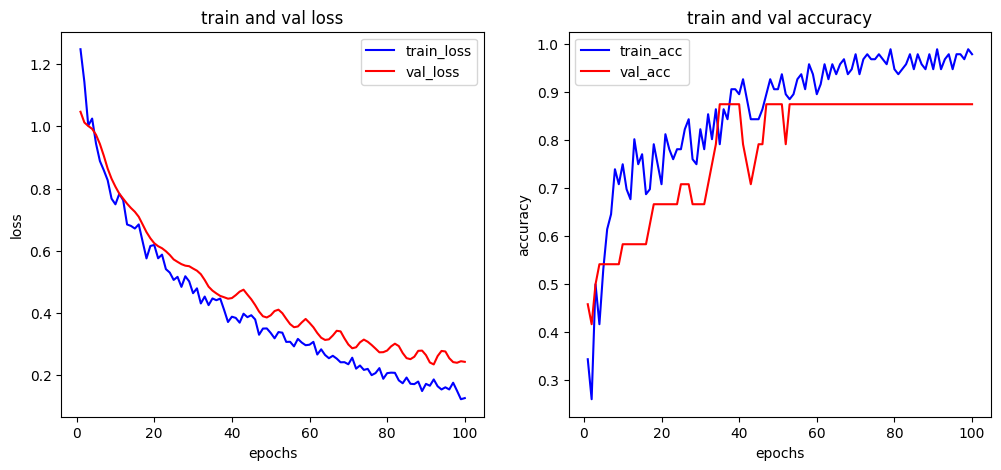

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.set_title('train and val loss')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, 'b-', label='train_acc')
ax2.plot(epochs, val_acc, 'r-', label='val_acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.set_title('train and val accuracy')
ax2.legend()

plt.show()

In [ ]:
y_pred = model.predict(X_test)

print(y_pred.shape)

1/1 [==============================] - 0s 69ms/step
(30, 3)


In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
print(y_pred.shape)

(30,)


In [ ]:
#평가지표 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_score(y_test, y_pred):
  print("accuracy : %.3f" %(accuracy_score(y_test, y_pred)))
  print("precision : %.3f" %(precision_score(y_test, y_pred, average='macro')))
  print("recall_score : %.3f" %(recall_score(y_test, y_pred, average='macro')))
  print("f1_score : %.3f" %(f1_score(y_test, y_pred, average='macro')))

print_score(y_test, y_pred)

accuracy : 1.000
precision : 1.000
recall_score : 1.000
f1_score : 1.000
